In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import signal

#  Lo que se ejecutaria en el dispositivo SDR

In [2]:
nfft = 1024
tiempo = 20
x=numpy.fromfile('espectro', dtype=numpy.float32, count=-1, sep='')
ts = tiempo/(len(x)/nfft)

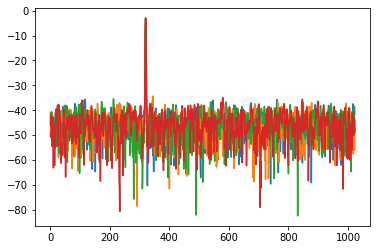

In [3]:
for i in range(4):
    plt.plot(x[i*nfft:(i+1)*nfft])

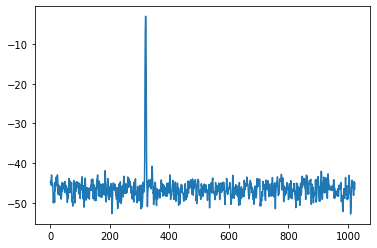

In [5]:
y = numpy.zeros(1024)
for i in range(10):
    y = x[i*nfft:(i+1)*nfft] + y
plt.plot(y/10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [6]:
def caracteristicas(x, nfft):
    """ Esta funcion extrae caracteristicas basicas
    del espectro sensado"""
    frames = int(len(x)/nfft)
    min_ = numpy.array([])
    max_ = numpy.array([])
    ener_ = numpy.array([])
    for i in range(frames-1):
        min_= numpy.append(min_, numpy.min(x[i*nfft:nfft*(i+1)]))
        max_= numpy.append(max_, numpy.max(x[i*nfft:nfft*(i+1)]))
        ener_ = numpy.append(ener_, numpy.sum(10**((x[nfft*i:nfft*(i+1)])/10.0)))
    ener_ = 10*numpy.log10(ener_)
    return min_, max_, ener_

In [7]:
min_, max_, ener_ = caracteristicas(x, nfft)

# Mirando el analisis desde el procesamiento

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
print(numpy.array([ener_, min_, max_]).T.shape)

(1718, 3)


In [10]:
df = pd.DataFrame(data=numpy.array([ener_, min_, max_]).T, columns=["ener_", "min_", "max_"])

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 3 columns):
ener_    1718 non-null float64
min_     1718 non-null float64
max_     1718 non-null float64
dtypes: float64(3)
memory usage: 40.3 KB


,ener_,min_,max_
count,1718.000000,1718.000000,1718.000000
mean,29.885070,-34.544703,10.561903
std,11.031860,16.541209,5.093338
min,0.003517,-100.562218,-3.158424
25%,33.748319,-34.230820,11.652880
50%,33.934901,-28.888644,12.223191
75%,34.099532,-25.186977,12.827769
max,34.747981,-17.084002,15.655535


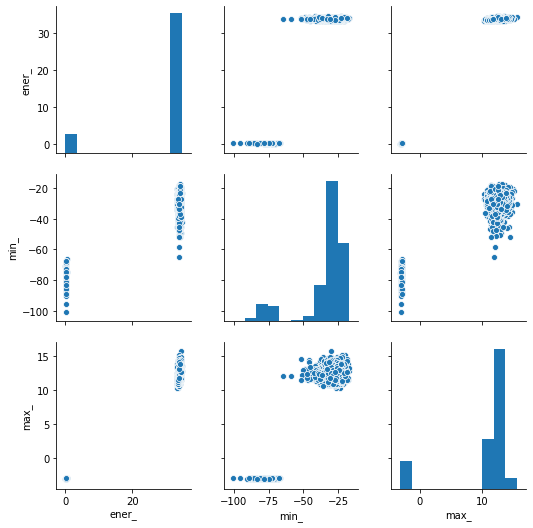

In [12]:
sns.pairplot(df)

# Distribuciones

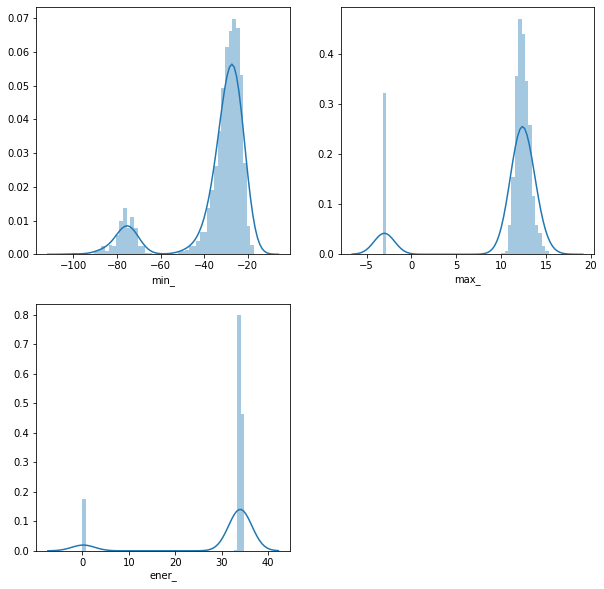

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["min_"])
plt.subplot(2,2,2)
sns.distplot(df["max_"])
plt.subplot(2,2,3)
sns.distplot(df["ener_"])

In [14]:
frames = int(len(x)/nfft)
s = x[0:nfft*1]
for i in range(1000):
    s = numpy.vstack((s, x[nfft*(i+1):nfft*(i+2)]))
s=s.T

In [15]:
dfs = pd.DataFrame(s)

In [16]:
# sns.pairplot(dfs) # creo que no aporta 

In [16]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
0    1024 non-null float32
1    1024 non-null float32
2    1024 non-null float32
3    1024 non-null float32
4    1024 non-null float32
5    1024 non-null float32
dtypes: float32(6)
memory usage: 24.1 KB


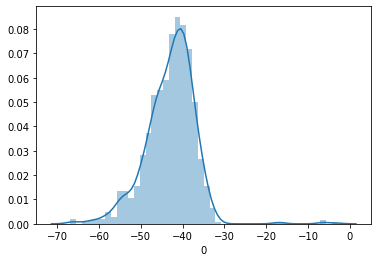

In [17]:
sns.distplot(dfs[0])

In [18]:
dfs.corr()

,0,1,2,3,4,5
0,1.000000,0.169352,0.128956,0.151078,0.177400,0.161729
1,0.169352,1.000000,0.164230,0.171257,0.218723,0.186441
2,0.128956,0.164230,1.000000,0.125540,0.138039,0.105112
3,0.151078,0.171257,0.125540,1.000000,0.165835,0.102344
4,0.177400,0.218723,0.138039,0.165835,1.000000,0.162442
5,0.161729,0.186441,0.105112,0.102344,0.162442,1.000000


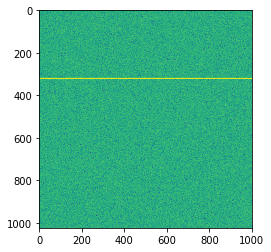

In [21]:
plt.imshow(dfs)